# Time Series Forecasting

## Read data from csv

In [3]:
import pandas as pd

filename = '1981-australia.csv'
data = pd.read_csv(filename, index_col=0, parse_dates=True, squeeze=True)
serie = pd.DataFrame(data)
serie.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Prepare to analyze

In [8]:
X = serie.values
size = int(len(X) * 0.8)
train, test = X[:size], X[size:]

## For prediction

In [9]:
history = [x for x in train]   # first 80%
predictions = []               # here will be last 20%
prediction_result = [x for x in train]   # for plot building

## Walk-forward validation and forecasting

In [10]:
from statsmodels.tsa.arima.model import ARIMA

pred_expect = []

for t_idx in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) # generate model
    model_fit = model.fit()    # Fitting -> Learning
    output = model_fit.forecast()   # Forecasting result
    
    yhat = output[0]   # What we predicted
    predictions.append(yhat)

    observation = test[t_idx]   # What we expected
    history.append(observation)

    print(f'predicted: {yhat}, expected: {observation}')

    pred_expect.append([yhat, observation])  # We will save to file our results

predicted: 10.114935321672279, expected: [11.2]
predicted: 10.313941683818653, expected: [13.2]
predicted: 11.90169970185054, expected: [11.4]
predicted: 10.732171979999343, expected: [9.1]
predicted: 9.65760764523321, expected: [6.6]
predicted: 8.203597206137514, expected: [8.4]
predicted: 9.28374184768146, expected: [9.7]
predicted: 9.830591145619483, expected: [13.2]
predicted: 11.812087807702298, expected: [12.5]
predicted: 11.161622183459432, expected: [11.]
predicted: 10.504147238805093, expected: [11.]
predicted: 10.828246123608357, expected: [11.7]
predicted: 11.621962478375941, expected: [9.2]
predicted: 10.232199778174442, expected: [11.5]
predicted: 11.476934287990591, expected: [13.6]
predicted: 12.532613346418321, expected: [13.7]
predicted: 12.865724091703955, expected: [10.4]
predicted: 10.830077911098629, expected: [11.5]
predicted: 11.530075779240713, expected: [7.6]
predicted: 9.196123039207935, expected: [9.6]
predicted: 10.564701545027082, expected: [14.2]
predicted

## Let's evaluate our forecasting

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

root_mean_squared_error = sqrt(mean_squared_error(test, predictions))
print('Root mean squared error: ', root_mean_squared_error)

Root mean squared error:  2.117738916517068


## Build a plot comparing our forecasts to real results

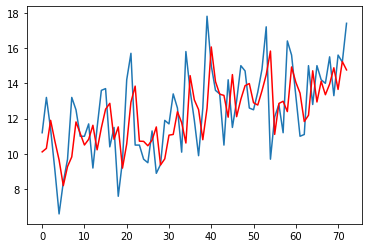

In [12]:
from matplotlib import pyplot as plt

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()